#**Serverless application deployment and scheduling services for autonomous vehicles and infrastructure**

## *In this file, the empirical data gathered from the outputs of the source codes has been used to generate the plots and different approaches are compared with respect to their performances.*

### **1. Evaluation of AV services handling success rate**

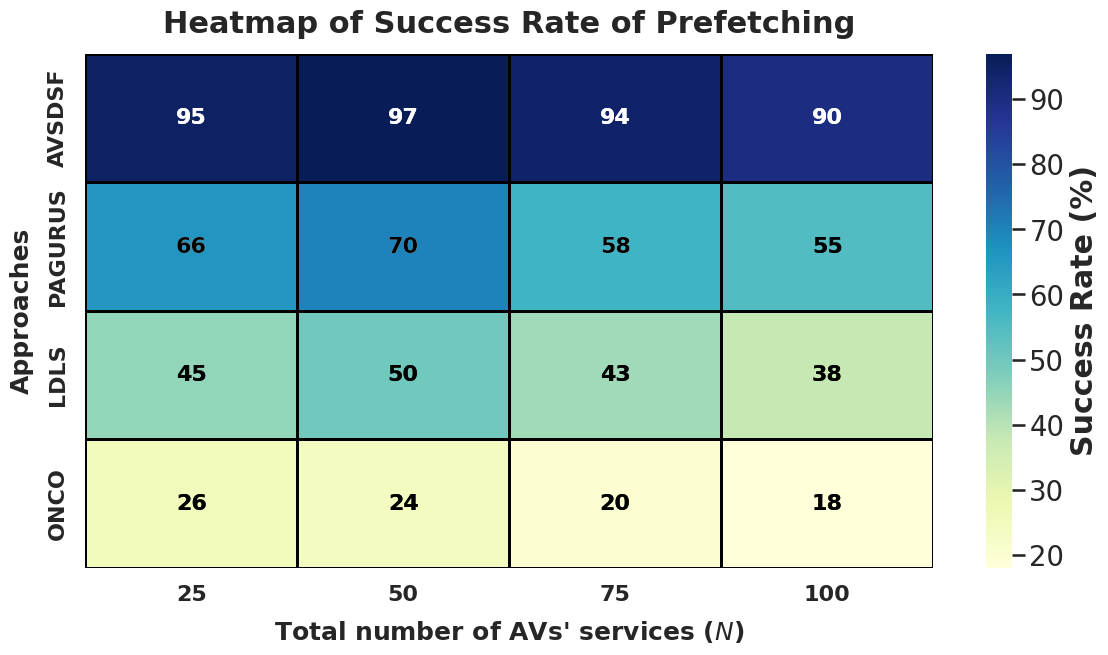

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sns.set_theme(style="darkgrid", context="talk", font_scale=1.2)

data = np.array([
    [95, 97, 94, 90],   # AVSDSF
    [66, 70, 58, 55],   # PAGURUS
    [45, 50, 43, 38],   # LDLS
    [26, 24, 20, 18],   # ONCO
])

algorithms = ['AVSDSF', 'PAGURUS', 'LDLS', 'ONCO']
tree_sizes = [25, 50, 75, 100]

df = pd.DataFrame(data, index=algorithms, columns=tree_sizes)

plt.figure(figsize=(12, 7))

# Create a custom annotation colors array
annot_colors = np.full(df.shape, 'black', dtype=object)  # default black
annot_colors[0, :] = 'white'  # make AVSDSF row white

# Plot heatmap
sns.heatmap(
    df,
    annot=df.values,           # show data
    fmt="d",
    cmap="YlGnBu",             # keep original colormap
    linewidths=1,
    linecolor="black",
    cbar_kws={'label': 'Success Rate (%)'},
    annot_kws={"size": 16, "weight": "bold"},
)

# Re-annotate with custom colors
for i in range(df.shape[0]):
    for j in range(df.shape[1]):
        plt.text(
            j + 0.5, i + 0.5, str(df.iloc[i, j]),
            ha='center', va='center',
            color=annot_colors[i, j],
            fontsize=16,
            fontweight='bold'
        )

plt.title(
    "Heatmap of Success Rate of Prefetching",
    fontsize=22,
    weight="bold",
    pad=15
)

plt.xlabel(
    "Total number of AVs' services ($N$)",
    fontsize=18,
    weight="bold",
    labelpad=10
)

plt.ylabel(
    "Approaches",
    fontsize=18,
    weight="bold",
    labelpad=10
)

plt.xticks(fontsize=16, weight="bold")
plt.yticks(fontsize=16, weight="bold")

plt.tight_layout()
plt.show()


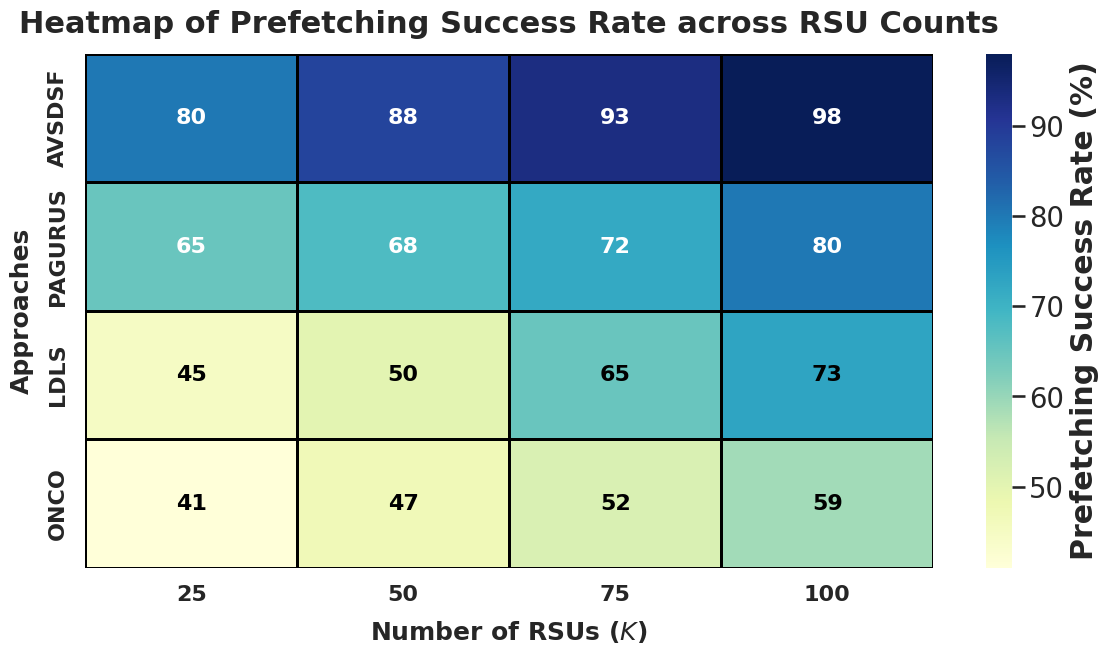

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Prefetching success rate data across RSU counts
data = {
    "25": [80, 65, 45, 41],
    "50": [88, 68, 50, 47],
    "75": [93, 72, 65, 52],
    "100": [98, 80, 73, 59]
}

# Index of algorithms
algorithms = ["AVSDSF", "PAGURUS", "LDLS", "ONCO"]

# Create a DataFrame
df = pd.DataFrame(data, index=algorithms)

# Set seaborn theme for a darker, cleaner look
sns.set_theme(style="darkgrid", context="talk", font_scale=1.2)

plt.figure(figsize=(12, 7))

# Create a custom annotation colors array
annot_colors = np.full(df.shape, 'black', dtype=object)  # default black
annot_colors[0, :] = 'white'  # AVSDSF row in white
annot_colors[1, :] = 'white'  # PAGURUS row in white

# Plot heatmap without annotations first
sns.heatmap(
    df,
    annot=False,                # turn off default annotations
    cmap="YlGnBu",              # keep original colormap
    fmt="d",
    linewidths=1,
    linecolor="black",
    cbar_kws={'label': 'Prefetching Success Rate (%)'},
)

# Add custom annotations with desired colors
for i in range(df.shape[0]):
    for j in range(df.shape[1]):
        plt.text(
            j + 0.5, i + 0.5, str(df.iloc[i, j]),
            ha='center', va='center',
            color=annot_colors[i, j],
            fontsize=16,
            fontweight='bold'
        )

# Titles and labels
plt.title(
    "Heatmap of Prefetching Success Rate across RSU Counts",
    fontsize=22,
    weight="bold",
    pad=15
)
plt.xlabel("Number of RSUs ($K$)", fontsize=18, weight="bold", labelpad=10)
plt.ylabel("Approaches", fontsize=18, weight="bold", labelpad=10)
plt.xticks(fontsize=16, weight="bold")
plt.yticks(fontsize=16, weight="bold")

plt.tight_layout()
plt.show()


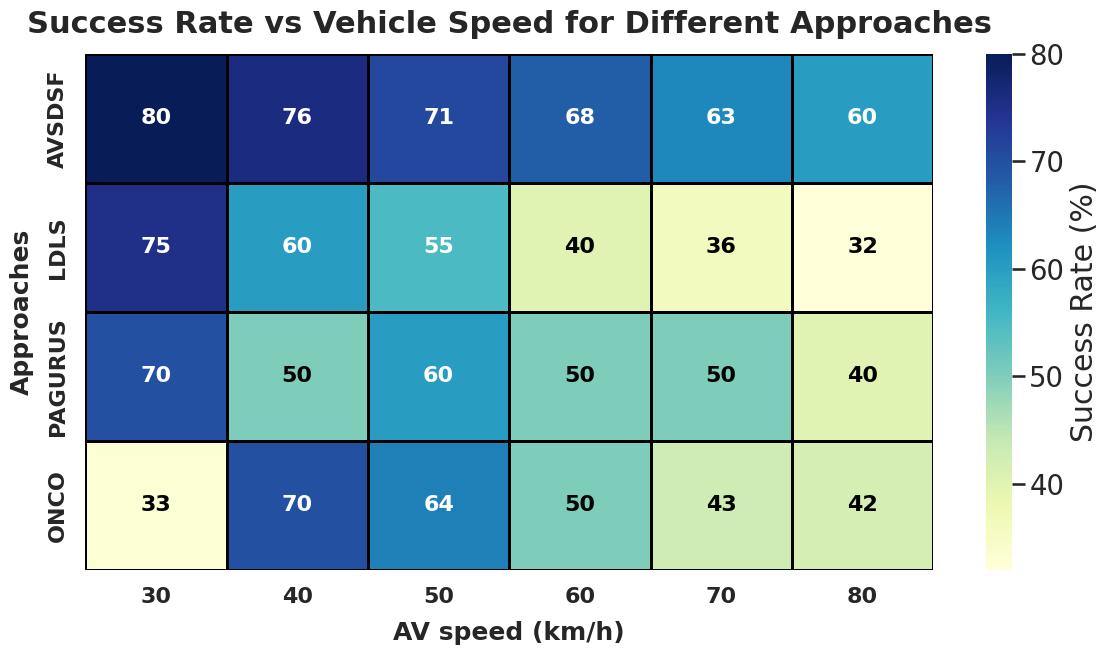

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Success rate data (rows: approaches, columns: vehicle speeds)
data = {
    30: [80, 75, 70, 33],
    40: [76, 60, 50, 70],
    50: [71, 55, 60, 64],
    60: [68, 40, 50, 50],
    70: [63, 36, 50, 43],
    80: [60, 32, 40, 42]
}

# Index of algorithms (in order: bottom to top in heatmap)
approaches = ["AVSDSF", "LDLS", "PAGURUS", "ONCO"]

# Create DataFrame
df = pd.DataFrame(data, index=approaches)

# Set seaborn theme for darker, cleaner look
sns.set_theme(style="darkgrid", context="talk", font_scale=1.2)

plt.figure(figsize=(12, 7))

# Create custom annotation colors array
annot_colors = np.full(df.shape, 'black', dtype=object)  # default black

# AVSDSF: all cells white
annot_colors[0, :] = 'white'

# LDLS: first three cells white
annot_colors[1, 0:3] = 'white'

# PAGURUS: first and third cells white
annot_colors[2, [0, 2]] = 'white'

# ONCO: second and third cells white
annot_colors[3, [1, 2]] = 'white'

# Plot heatmap without annotations first
sns.heatmap(
    df,
    annot=False,               # turn off default annotations
    cmap="YlGnBu",             # keep original colormap
    fmt="d",
    linewidths=1,
    linecolor="black",
    cbar_kws={'label': 'Success Rate (%)'},
)

# Add custom annotations with desired colors
for i in range(df.shape[0]):
    for j in range(df.shape[1]):
        plt.text(
            j + 0.5, i + 0.5, str(df.iloc[i, j]),
            ha='center', va='center',
            color=annot_colors[i, j],
            fontsize=16,
            fontweight='bold'
        )

# Titles and labels
plt.title(
    "Success Rate vs Vehicle Speed for Different Approaches",
    fontsize=22,
    weight="bold",
    pad=15
)
plt.xlabel("AV speed (km/h)", fontsize=18, weight="bold", labelpad=10)
plt.ylabel("Approaches", fontsize=18, weight="bold", labelpad=10)
plt.xticks(fontsize=16, weight="bold")
plt.yticks(fontsize=16, weight="bold")

plt.tight_layout()
plt.show()


### **2. Evaluation of AVs prioritized services handling success rate**

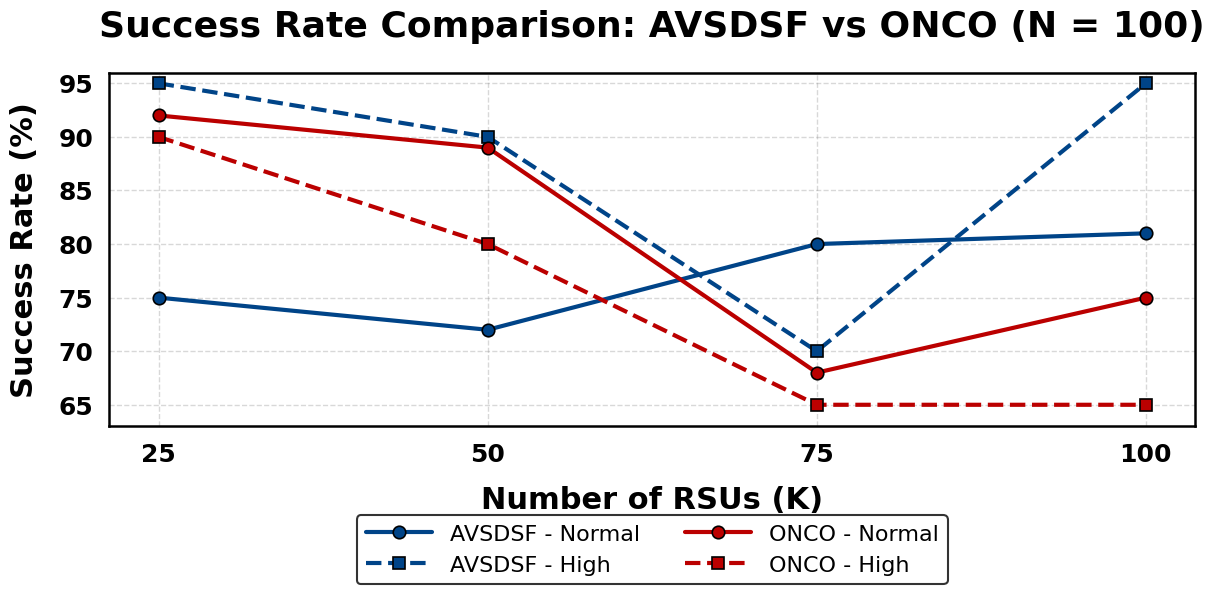

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ---------------- Data ----------------
data = {
    'AVSDSF': {
        'Normal': [75, 72, 80, 81],
        'High':   [95, 90, 70, 95]
    },
    'ONCO': {
        'Normal': [92, 89, 68, 75],
        'High':   [90, 80, 65, 65]
    },
    'PAGURUS': {
        'Normal': [78, 52, 52, 50],
        'High':   [79, 62, 70, 70]
    },
    'LDLS': {
        'Normal': [86, 82, 82, 84],
        'High':   [80, 80, 81, 83]
    }
}

# ---------------- X-axis ----------------
rsus = [25, 50, 75, 100]
x = np.array(rsus)

# ---------------- Colors (UNCHANGED) ----------------
color_map = {
    'AVSDSF': '#004488',
    'ONCO': '#BB0000'
}

# ---------------- Line styles (UNCHANGED) ----------------
linestyles = {
    'Normal': '-',
    'High': '--'
}

# ---------------- Create Plot (slightly bigger) ----------------
fig, ax = plt.subplots(figsize=(12.5, 8.5))
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# ---------------- Plot lines ----------------
for algo in ['AVSDSF', 'ONCO']:
    for condition in ['Normal', 'High']:
        ax.plot(
            x,
            data[algo][condition],
            label=f"{algo} - {condition}",
            color=color_map[algo],
            linestyle=linestyles[condition],
            linewidth=3,
            marker='o' if condition == 'Normal' else 's',
            markersize=9,
            markeredgecolor='black',
            markeredgewidth=1.2,
            zorder=5
        )

# ---------------- Title & Labels ----------------
ax.set_title(
    "Success Rate Comparison: AVSDSF vs ONCO (N = 100)",
    fontsize=26,
    fontweight='bold',
    pad=26,
    color='black'
)

ax.set_xlabel(
    "Number of RSUs (K)",
    fontsize=22,
    fontweight='bold',
    labelpad=14,
    color='black'
)

ax.set_ylabel(
    "Success Rate (%)",
    fontsize=22,
    fontweight='bold',
    labelpad=14,
    color='black'
)

# ---------------- X-axis Ticks ----------------
ax.set_xticks(x)
ax.tick_params(
    axis='x',
    labelsize=18,
    width=2,
    length=8,
    direction='out',
    colors='black'
)

# ---------------- Y-axis (SPACE BELOW 65) ----------------
ax.set_ylim(63, 96)                      # space below 65
ax.set_yticks(np.arange(65, 100, 5))    # ticks still start at 65
ax.tick_params(
    axis='y',
    labelsize=18,
    width=2,
    length=8,
    direction='out',
    colors='black'
)

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontweight('bold')

# ---------------- Axes Spines ----------------
for spine in ax.spines.values():
    spine.set_linewidth(1.8)
    spine.set_color('black')

# ---------------- Grid ----------------
ax.grid(
    True,
    linestyle='--',
    linewidth=1.0,
    color='gray',
    alpha=0.30,
    zorder=0
)

# ---------------- Legend (outside) ----------------
legend = ax.legend(
    fontsize=16,
    frameon=True,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.22),
    ncol=2,
    handlelength=3,
    labelcolor='black'
)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(1.5)
legend.set_zorder(10)

# ---------------- Layout ----------------
plt.tight_layout(rect=[0, 0.12, 1, 0.95])
plt.show()


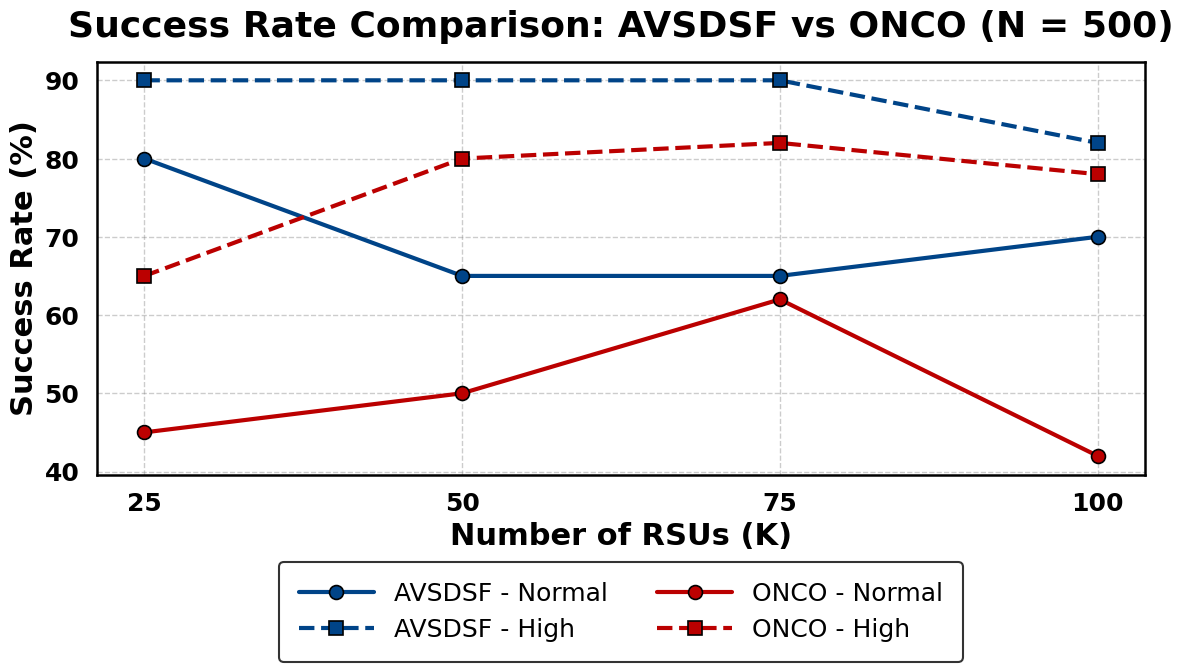

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ---------------- Data ----------------
data_n500 = {
    'AVSDSF': {
        'Normal': [80, 65, 65, 70],
        'High':   [90, 90, 90, 82]
    },
    'ONCO': {
        'Normal': [45, 50, 62, 42],
        'High':   [65, 80, 82, 78]
    },
    'PAGURUS': {
        'Normal': [50, 50, 50, 50],
        'High':   [75, 75, 70, 72]
    },
    'LDLS': {
        'Normal': [70, 65, 72, 72],
        'High':   [67, 62, 65, 71]
    }
}

# X-axis: Number of RSUs
rsus = [25, 50, 75, 100]
x = np.array(rsus)

# Colors (unchanged)
color_map = {
    'AVSDSF': '#004488',
    'ONCO': '#BB0000'
}

# Line styles (unchanged)
linestyles = {
    'Normal': '-',
    'High': '--'
}

# ---------------- Create Plot ----------------
fig, ax = plt.subplots(figsize=(12, 7))
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

for algo in ['AVSDSF', 'ONCO']:
    for condition in ['Normal', 'High']:
        marker_type = 'o' if condition == 'Normal' else 's'
        ax.plot(
            x,
            data_n500[algo][condition],
            label=f"{algo} - {condition}",
            color=color_map[algo],
            linestyle=linestyles[condition],
            linewidth=3,
            marker=marker_type,
            markersize=10,
            markeredgecolor='black',   # enhances visibility
            markeredgewidth=1.2,
            zorder=3
        )

# ---------------- Title and Labels ----------------
ax.set_title(
    "Success Rate Comparison: AVSDSF vs ONCO (N = 500)",
    fontsize=26,                   # increased
    fontweight='bold',
    pad=18,
    color='black'
)
ax.set_xlabel("Number of RSUs (K)", fontsize=22, fontweight='bold', color='black')
ax.set_ylabel("Success Rate (%)", fontsize=22, fontweight='bold', color='black')

# ---------------- Ticks ----------------
ax.set_xticks(x)
ax.tick_params(axis='x', labelsize=18, width=2, colors='black')
ax.tick_params(axis='y', labelsize=18, width=2, colors='black')

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontweight('bold')

# ---------------- Spines (dark & clear) ----------------
for spine in ax.spines.values():
    spine.set_linewidth(1.8)
    spine.set_color('black')

# ---------------- Grid & Legend ----------------
ax.grid(
    True,
    linestyle='--',
    linewidth=1.0,
    color='gray',
    alpha=0.4,
    zorder=0
)


legend = ax.legend(
    fontsize=18,
    frameon=True,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.18),   # outside, below the plot
    ncol=2,
    handlelength=3,
    handletextpad=0.8,
    borderpad=0.8,
    labelcolor='black'
)

legend.get_frame().set_facecolor('white')
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(1.5)
legend.set_zorder(10)

plt.tight_layout(rect=[0, 0.08, 1, 1])  # reserve space for legend



plt.tight_layout()
plt.show()


## **3. Evaluation of link utilization and services distribution time**

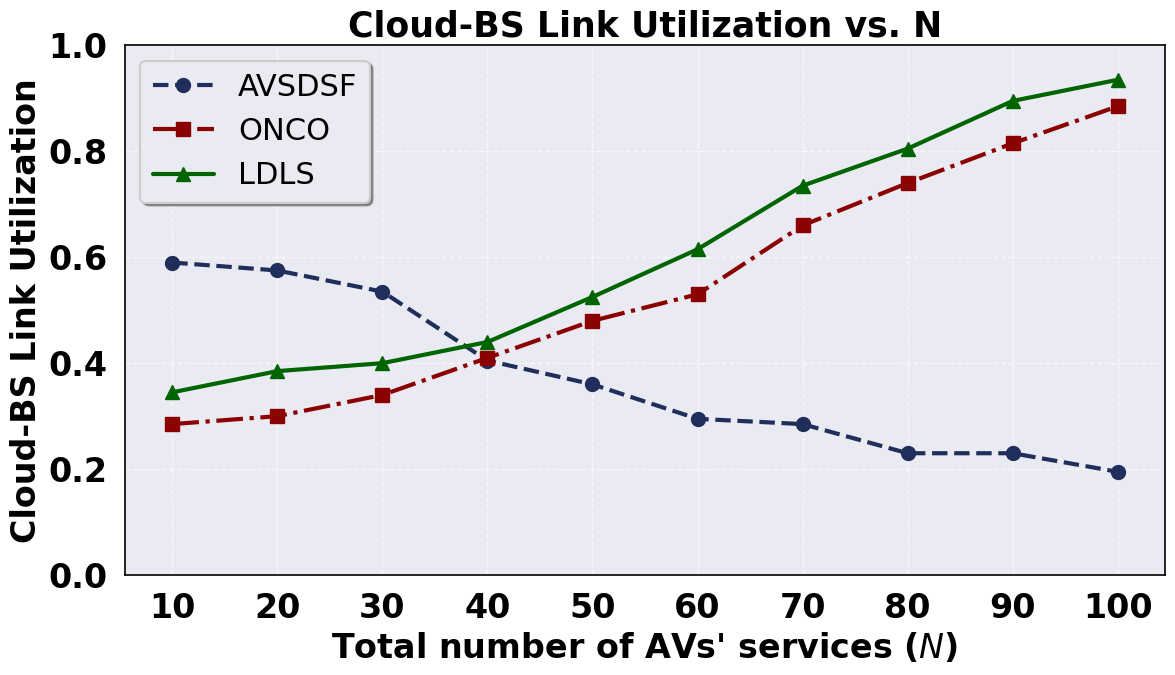

In [ ]:
import matplotlib.pyplot as plt

# Data from the figure
N = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

AVSDSF = [0.59, 0.575, 0.535, 0.405, 0.36, 0.295, 0.285, 0.23, 0.23, 0.195]
ONCO   = [0.285, 0.30, 0.34, 0.41, 0.48, 0.53, 0.66, 0.74, 0.815, 0.885]
LDLS   = [0.345, 0.385, 0.40, 0.44, 0.525, 0.615, 0.735, 0.805, 0.895, 0.935]

# Plot
plt.figure(figsize=(12, 7))

plt.plot(
    N, AVSDSF,
    linestyle='--',
    marker='o',
    linewidth=3,  # slightly bolder
    markersize=10,
    color='#1f2e5a',  # darker blue
    label='AVSDSF'
)

plt.plot(
    N, ONCO,
    linestyle='-.',
    marker='s',
    linewidth=3,
    markersize=10,
    color='#8b0000',  # darker red
    label='ONCO'
)

plt.plot(
    N, LDLS,
    linestyle='-',
    marker='^',
    linewidth=3,
    markersize=10,
    color='#006400',  # darker green
    label='LDLS'
)

# Labels and title with maximum readable fonts
plt.xlabel(r"Total number of AVs' services ($N$)", fontsize=24, fontweight='bold', color='black')
plt.ylabel('Cloud-BS Link Utilization', fontsize=24, fontweight='bold', color='black')
plt.title('Cloud-BS Link Utilization vs. N', fontsize=25, fontweight='bold', color='black')

# Maximize tick fonts
plt.xticks(N, fontsize=24, fontweight='bold', color='black')  # Forces 10, 20, 30, ..., 100 to be visible
plt.yticks(fontsize=24, fontweight='bold', color='black')

# Axes, grid, legend
plt.ylim(0, 1.0)
plt.grid(True, linestyle='--', linewidth=1, alpha=0.7)
plt.legend(loc='upper left', fontsize=22, frameon=True, shadow=True)

# Layout
plt.tight_layout()
plt.show()


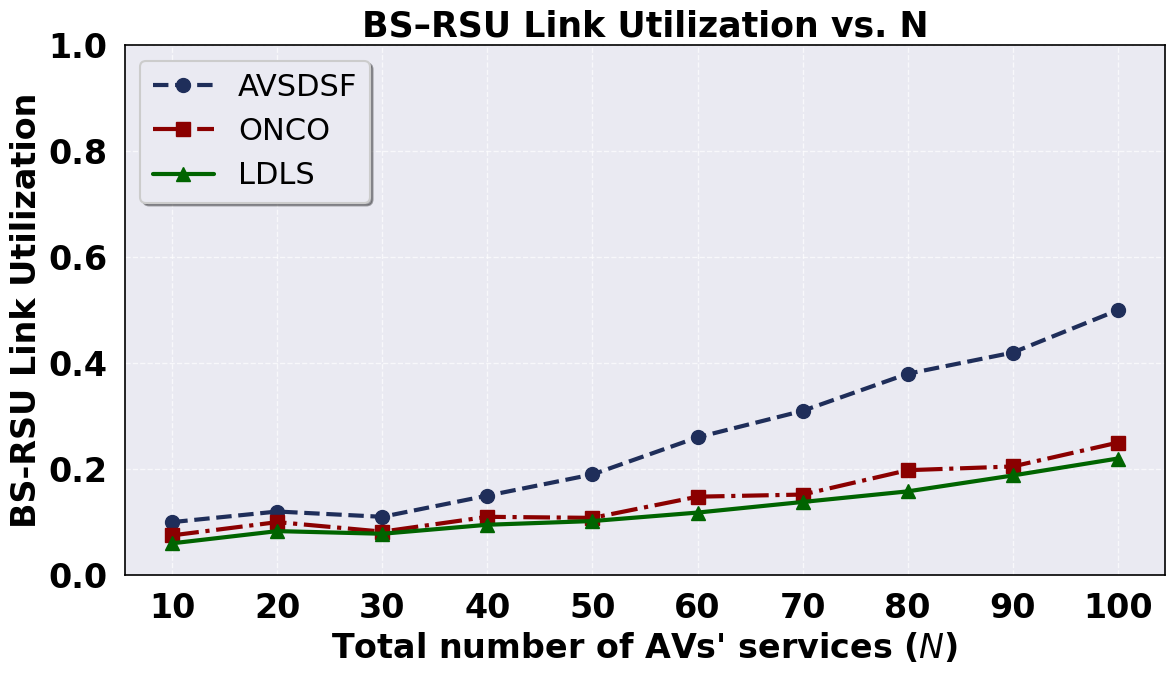

In [ ]:
import matplotlib.pyplot as plt

# X-axis values
N = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

avsdsf = [0.10, 0.12, 0.11, 0.15, 0.19, 0.26, 0.31, 0.38, 0.42, 0.50]
onco   = [0.075, 0.100, 0.082, 0.110, 0.108, 0.148, 0.152, 0.198, 0.205, 0.250]
ldls   = [0.060, 0.083, 0.078, 0.095, 0.102, 0.118, 0.138, 0.158, 0.188, 0.220]

# Plot
plt.figure(figsize=(12, 7))

plt.plot(
    N, avsdsf,
    linestyle='--',
    marker='o',
    linewidth=3,  # slightly bolder
    markersize=10,
    color='#1f2e5a',  # darker blue
    label='AVSDSF'
)

plt.plot(
    N, onco,
    linestyle='-.',
    marker='s',
    linewidth=3,
    markersize=10,
    color='#8b0000',  # darker red
    label='ONCO'
)

plt.plot(
    N, ldls,
    linestyle='-',
    marker='^',
    linewidth=3,
    markersize=10,
    color='#006400',  # darker green
    label='LDLS'
)

# Labels and title with maximum readable fonts
plt.xlabel(r"Total number of AVs' services ($N$)", fontsize=24, fontweight='bold', color='black')
plt.ylabel('BS-RSU Link Utilization', fontsize=24, fontweight='bold', color='black')
plt.title('BS–RSU Link Utilization vs. N', fontsize=25, fontweight='bold', color='black')

# Maximize tick fonts
plt.xticks(N, fontsize=24, fontweight='bold', color='black')
plt.yticks(fontsize=24, fontweight='bold', color='black')

# Axes, grid, legend
plt.ylim(0, 1.0)
plt.grid(True, linestyle='--', linewidth=1, alpha=0.7)
plt.legend(loc='upper left', fontsize=22, frameon=True, shadow=True)

# Layout
plt.tight_layout()
plt.show()


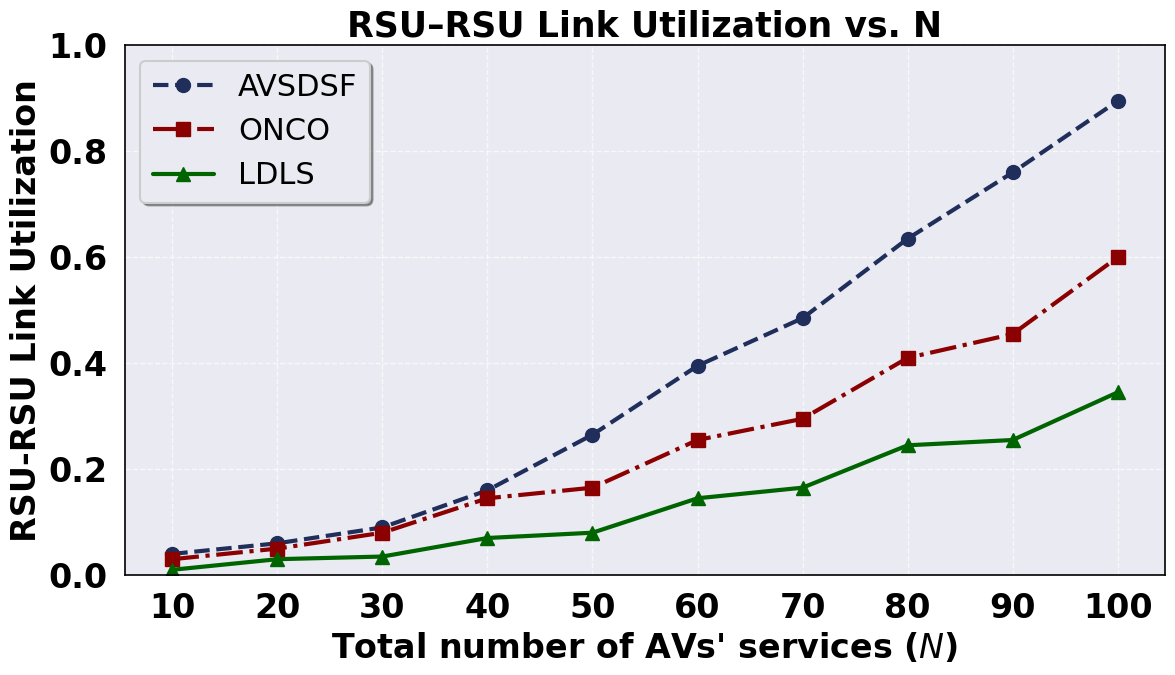

In [ ]:
import matplotlib.pyplot as plt

# X-axis values
N = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

avsdsf = [0.04, 0.060, 0.090, 0.160, 0.265, 0.395, 0.485, 0.635, 0.760, 0.895]
onco   = [0.03, 0.050, 0.080, 0.145, 0.165, 0.255, 0.295, 0.410, 0.455, 0.600]
ldls   = [0.01, 0.030, 0.035, 0.070, 0.080, 0.145, 0.165, 0.245, 0.255, 0.345]

# Plot
plt.figure(figsize=(12, 7))

plt.plot(
    N, avsdsf,
    linestyle='--',
    marker='o',
    linewidth=3,  # bolder
    markersize=10,
    color='#1f2e5a',  # darker blue
    label='AVSDSF'
)

plt.plot(
    N, onco,
    linestyle='-.',
    marker='s',
    linewidth=3,
    markersize=10,
    color='#8b0000',  # darker red
    label='ONCO'
)

plt.plot(
    N, ldls,
    linestyle='-',
    marker='^',
    linewidth=3,
    markersize=10,
    color='#006400',  # darker green
    label='LDLS'
)

# Labels and title with maximum readable fonts
plt.xlabel(r"Total number of AVs' services ($N$)", fontsize=24, fontweight='bold', color='black')
plt.ylabel('RSU-RSU Link Utilization', fontsize=24, fontweight='bold', color='black')
plt.title('RSU–RSU Link Utilization vs. N', fontsize=25, fontweight='bold', color='black')

# Maximize tick fonts
plt.xticks(N, fontsize=24, fontweight='bold', color='black')
plt.yticks(fontsize=24, fontweight='bold', color='black')

# Axes, grid, legend
plt.ylim(0, 1.0)
plt.grid(True, linestyle='--', linewidth=1, alpha=0.7)
plt.legend(loc='upper left', fontsize=22, frameon=True, shadow=True)

# Layout
plt.tight_layout()
plt.show()


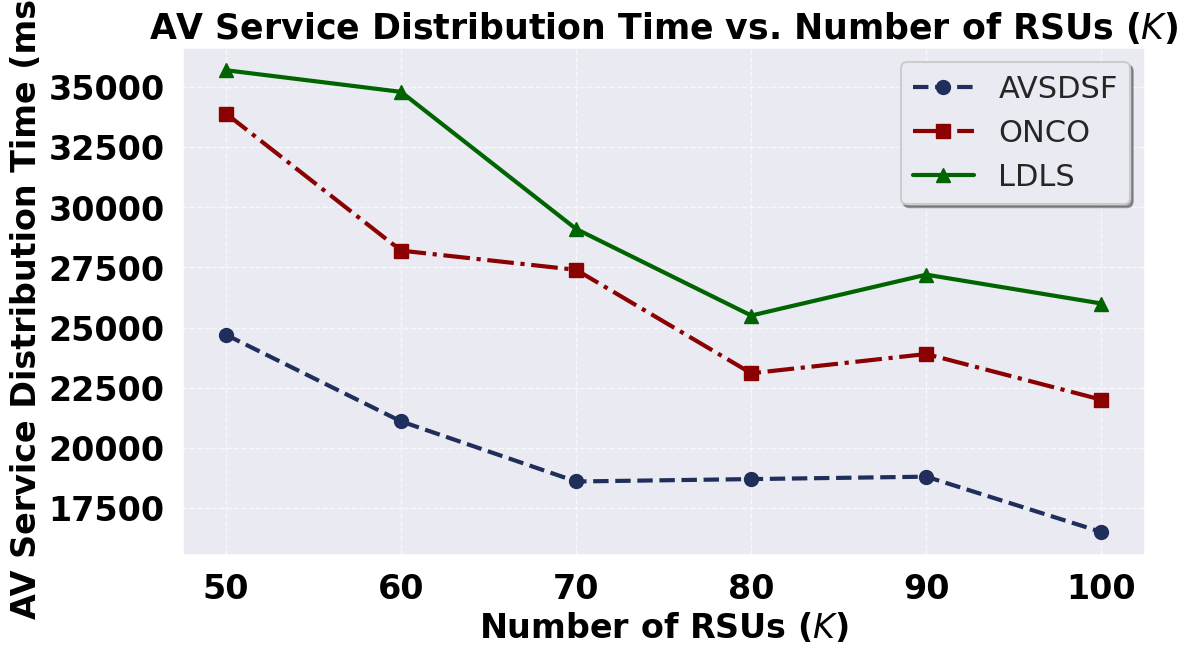

In [ ]:
import matplotlib.pyplot as plt

# Original X-axis and data
K = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
avsdsf = [25600, 23900, 27100, 22800, 24700, 21100, 18600, 18700, 18800, 16500]
onco   = [38800, 35500, 36400, 32100, 33900, 28200, 27400, 23100, 23900, 22000]
ldls   = [42200, 39000, 40000, 35700, 35700, 34800, 29100, 25500, 27200, 26000]

# Filter for K from 50 to 100
K_new = K[4:]          # [50, 60, 70, 80, 90, 100]
avsdsf_new = avsdsf[4:]
onco_new = onco[4:]
ldls_new = ldls[4:]

# Plot
plt.figure(figsize=(12, 7))

plt.plot(K_new, avsdsf_new, linestyle='--', marker='o', linewidth=3, markersize=10, color='#1f2e5a', label='AVSDSF')
plt.plot(K_new, onco_new, linestyle='-.', marker='s', linewidth=3, markersize=10, color='#8b0000', label='ONCO')
plt.plot(K_new, ldls_new, linestyle='-', marker='^', linewidth=3, markersize=10, color='#006400', label='LDLS')

# Labels and title with maximum readable fonts
plt.xlabel(r'Number of RSUs ($K$)', fontsize=24, fontweight='bold', color='black')
plt.ylabel('AV Service Distribution Time (ms)', fontsize=24, fontweight='bold', color='black')
plt.title('AV Service Distribution Time vs. Number of RSUs ($K$)', fontsize=25, fontweight='bold', color='black')

# Maximize tick fonts
plt.xticks(K_new, fontsize=24, fontweight='bold', color='black')
plt.yticks(fontsize=24, fontweight='bold', color='black')

# Grid and legend
plt.grid(True, linestyle='--', linewidth=1, alpha=0.7)
plt.legend(loc='upper right', fontsize=22, frameon=True, shadow=True)

# Layout
plt.tight_layout()
plt.show()


## **4. Evaluation of optimal RSU utilization**

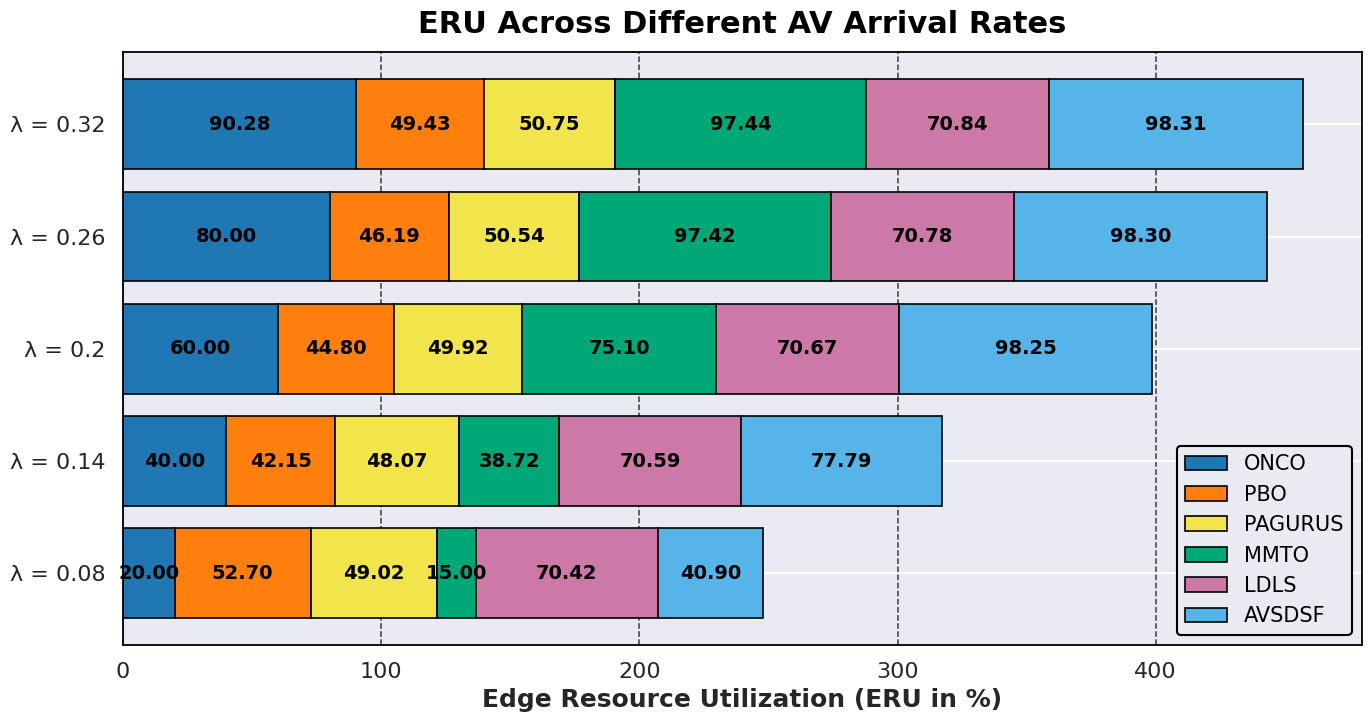

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ---------------- Data (UNCHANGED) ----------------
lambdas = [0.08, 0.14, 0.20, 0.26, 0.32]

ONCO    = [20.00, 40.00, 60.00, 80.00, 90.28]
PBO     = [52.70, 42.15, 44.80, 46.19, 49.43]
PAGURUS = [49.02, 48.07, 49.92, 50.54, 50.75]
MMTO    = [15.00, 38.72, 75.10, 97.42, 97.44]
LDLS    = [70.42, 70.59, 70.67, 70.78, 70.84]
AVSDSF  = [40.90, 77.79, 98.25, 98.30, 98.31]

data   = [ONCO, PBO, PAGURUS, MMTO, LDLS, AVSDSF]
labels = ["ONCO", "PBO", "PAGURUS", "MMTO", "LDLS", "AVSDSF"]

# ---------------- Original Colors (UNCHANGED) ----------------
colors = [
    "#1f77b4",  # ONCO
    "#ff7f0e",  # PBO
    "#f1e54b",  # PAGURUS
    "#00a878",  # MMTO
    "#cc79a7",  # LDLS
    "#56b4e9"   # AVSDSF
]

# ---------------- Style Enhancements ----------------
plt.rcParams.update({
    "font.size": 16,
    "axes.titlesize": 22,
    "axes.labelsize": 18,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "legend.fontsize": 15,
    "axes.titleweight": "bold",
    "axes.labelweight": "bold",
    "axes.edgecolor": "black",
    "axes.linewidth": 1.3,
    "text.color": "black"
})

fig, ax = plt.subplots(figsize=(14, 7.5))

y = np.arange(len(lambdas))
left = np.zeros(len(lambdas))

# ---------------- Plot ----------------
for values, label, color in zip(data, labels, colors):
    ax.barh(
        y,
        values,
        left=left,
        color=color,
        edgecolor="black",
        linewidth=1.2,
        label=label
    )

    # Value labels (BLACK ONLY)
    for i, v in enumerate(values):
        ax.text(
            left[i] + v / 2,
            i,
            f"{v:.2f}",
            ha="center",
            va="center",
            fontsize=14,
            fontweight="bold",
            color="black"
        )

    left += np.array(values)

# ---------------- Axes & Labels ----------------
ax.set_yticks(y)
ax.set_yticklabels([f"λ = {l}" for l in lambdas])
ax.set_xlabel("Edge Resource Utilization (ERU in %)")
ax.set_title("ERU Across Different AV Arrival Rates", pad=14)

# ---------------- Grid & Legend ----------------
ax.grid(axis="x", linestyle="--", linewidth=1.1, alpha=0.75, color="black")
ax.set_axisbelow(True)

ax.legend(
    loc="lower right",
    frameon=True,
    framealpha=1.0,
    edgecolor="black"
)

plt.tight_layout()
plt.show()


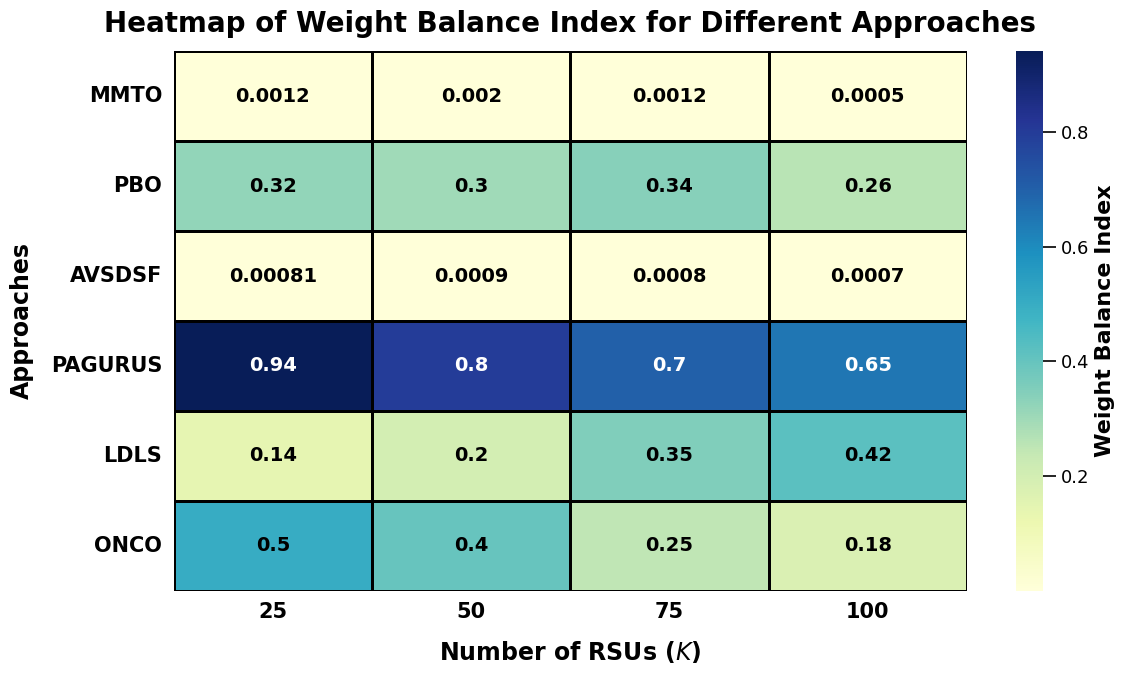

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ---------------- Data (UNCHANGED) ----------------
data = np.array([
    [0.0012, 0.002, 0.0012, 0.0005],     # MMTO
    [0.32, 0.30, 0.34, 0.26],            # PBO
    [0.00081, 0.0009, 0.0008, 0.0007],   # AVSDSF
    [0.94, 0.80, 0.70, 0.65],            # PAGURUS
    [0.14, 0.20, 0.35, 0.42],            # LDLS
    [0.50, 0.40, 0.25, 0.18],            # ONCO
])

algorithms = ['MMTO', 'PBO', 'AVSDSF', 'PAGURUS', 'LDLS', 'ONCO']
rsus = [25, 50, 75, 100]

df = pd.DataFrame(data, index=algorithms, columns=rsus)

# ---------------- Style Enhancements ----------------
plt.rcParams.update({
    "font.size": 15,
    "axes.titlesize": 20,
    "axes.labelsize": 17,
    "xtick.labelsize": 15,
    "ytick.labelsize": 15,
    "axes.edgecolor": "black",
    "axes.linewidth": 1.2,
    "text.color": "black"
})

plt.figure(figsize=(12, 7))

ax = sns.heatmap(
    df,
    annot=True,
    annot_kws={"size": 14},
    cmap="YlGnBu",
    linewidths=1.0,
    linecolor="black",
    cbar_kws={'label': 'Weight Balance Index'}
)

# ---------------- Annotation Styling ----------------
pagurus_row = algorithms.index("PAGURUS")

for text in ax.texts:
    row = int(text.get_position()[1] - 0.5)
    text.set_fontweight("bold")
    text.set_color("white" if row == pagurus_row else "black")

# ---------------- Labels & Title ----------------
ax.set_title(
    "Heatmap of Weight Balance Index for Different Approaches",
    pad=14,
    fontweight="bold",
    color="black"
)

ax.set_xlabel(
    "Number of RSUs ($K$)",
    labelpad=12,
    fontweight="bold",
    color="black"
)

ax.set_ylabel(
    "Approaches",
    labelpad=12,
    fontweight="bold",
    color="black"
)

# ---------------- Tick Styling (DARKENED) ----------------
ax.set_xticklabels(
    ax.get_xticklabels(),
    fontweight="bold",
    color="black"
)

ax.set_yticklabels(
    ax.get_yticklabels(),
    fontweight="bold",
    color="black"
)

ax.tick_params(axis='both', which='both', length=5, width=1.2, colors='black')

# ---------------- Colorbar Styling ----------------
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=13, width=1.2, colors='black')
cbar.set_label(
    "Weight Balance Index",
    fontsize=16,
    fontweight="bold",
    color="black"
)

plt.tight_layout()
plt.show()
